In [1]:
import numpy as np
import pandas as pd

In [2]:
%cd Z:\PPMI_Data\Excels\CollaborativeFiltering
df = pd.read_csv("NonMotor_2MergeTo1_LongCol.csv")
print(df.shape)
df.head(2)

Z:\PPMI_Data\Excels\CollaborativeFiltering
(247500, 3)


,Patient_ID,Features,Severity
0,1,Benton_COGSTATE,0
1,2,Benton_COGSTATE,1


C:\Users\system 4\AppData\Local\Temp\ipykernel_3352\723460866.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([num for num in ax.get_yticks()])


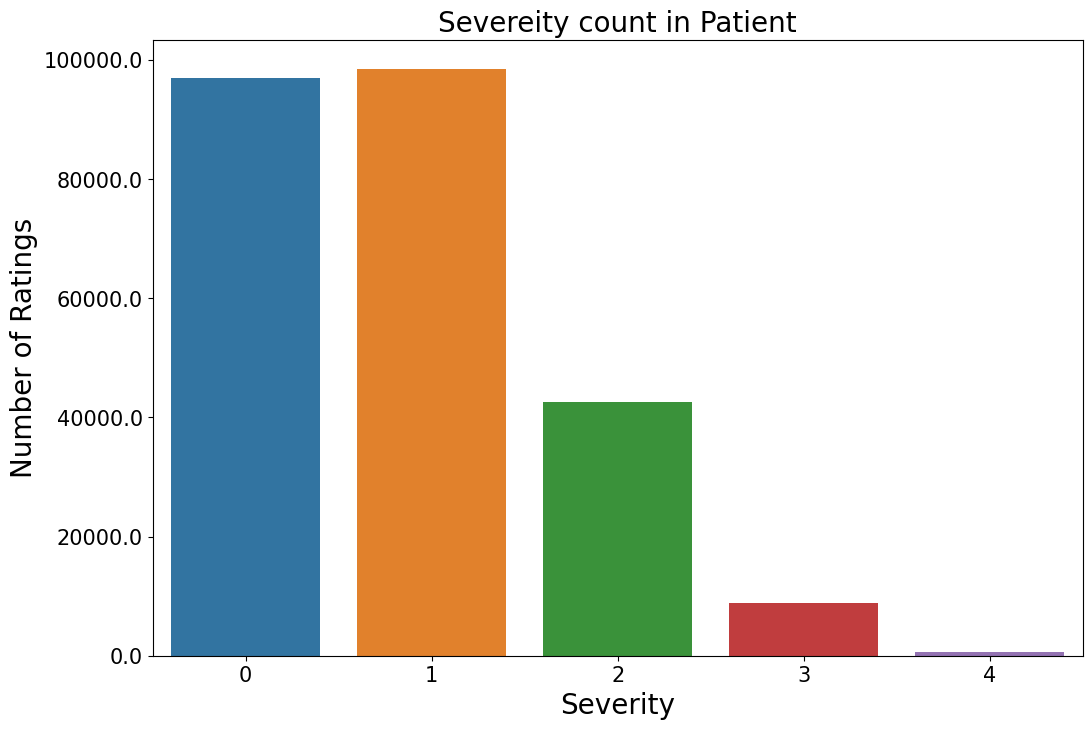

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))
ax = sns.countplot(x="Severity", data=df)
ax.set_yticklabels([num for num in ax.get_yticks()])
plt.tick_params(labelsize = 15)
plt.title("Severeity count in Patient", fontsize = 20)
plt.xlabel("Severity", fontsize = 20)
plt.ylabel("Number of Ratings", fontsize = 20)
plt.show()

## Collaborative Filtering Based Recommender System

In [4]:
# Selecting only those patient who have data of more than 40 tests/features 
# Here all patients have 45 tests/features
x = df.groupby('Patient_ID').count()['Severity'] > 40
padhe_likhe_users = x[x].index

In [5]:
# Patient ID we got above, now merging with their data
filtered_rating = df[df['Patient_ID'].isin(padhe_likhe_users)]
print(filtered_rating)
filtered_rating.head(2)

        Patient_ID              Features  Severity
0                1       Benton_COGSTATE         0
1                2       Benton_COGSTATE         1
2                3       Benton_COGSTATE         1
3                4       Benton_COGSTATE         2
4                5       Benton_COGSTATE         0
...            ...                   ...       ...
247495         246  Trail_Making_B_UPSIT         0
247496         247  Trail_Making_B_UPSIT         0
247497         248  Trail_Making_B_UPSIT         0
247498         249  Trail_Making_B_UPSIT         2
247499         250  Trail_Making_B_UPSIT         0

[247500 rows x 3 columns]


,Patient_ID,Features,Severity
0,1,Benton_COGSTATE,0
1,2,Benton_COGSTATE,1


In [6]:
# Selecting only those features which are present in at least 50 patients
# Here all 164 patients have all 45 features data, so any data will not be removed
y = filtered_rating.groupby('Features').count()['Severity']>=50
famous_books = y[y].index
print(famous_books.shape)

(990,)


In [7]:
# Creating final dataframe
# Here all are same as earlier
final_ratings = filtered_rating[filtered_rating['Features'].isin(famous_books)]
print(final_ratings.shape)
final_ratings.head(2)

(247500, 3)


,Patient_ID,Features,Severity
0,1,Benton_COGSTATE,0
1,2,Benton_COGSTATE,1


In [8]:
# Creating pivot table
# Features in row
pt = final_ratings.pivot_table(index='Features',columns='Patient_ID',values='Severity')
print(pt.shape)
pt.head(2)

(990, 250)


Patient_ID,1,2,3,4,5,6,7,8,9,10,...,241,242,243,244,245,246,247,248,249,250
Features,,,,,,,,,,,,,,,,,,,,,
Anxiety_Apathy,1,2,0,0,1,0,1,1,0,1,...,1,1,0,0,0,0,0,0,0,0
Anxiety_Constipate,2,1,0,0,1,0,0,0,0,1,...,1,1,0,0,0,0,2,0,0,0


In [9]:
# Selecting Patient
ptPD = pt.iloc[:, 0:164]
ptPD.shape

(990, 164)

In [10]:
# Selecting Healhty Control
ptH = pt.iloc[:, 164:]
ptH.shape

(990, 86)

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

In [12]:
# Creating similarity score of every feature with every other features: Patient
similarity_scores = cosine_similarity(ptPD)
print(similarity_scores.shape)

(990, 990)


In [13]:
# Creating similarity score of every feature with every other features: Healthy
Healthy_similarity_scores = cosine_similarity(ptH)
print(Healthy_similarity_scores.shape)

(990, 990)


In [14]:
def Recommend_Patient(Feature):
    # index fetch
    index = np.where(ptPD.index==Feature)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = df[df['Features'] == ptPD.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Features')['Features'].values))
        
        data.append(item)
    
    return data

In [15]:
def Recommend_Healthy(Feature):

    # index fetch
    Healthy_index = np.where(ptH.index==Feature)[0][0]
    Healthy_similar_items = sorted(list(enumerate(Healthy_similarity_scores[Healthy_index])),
                                   key=lambda x:x[1],reverse=True)[1:6]
    
    Healthy_data = []
    for i in Healthy_similar_items:
        item = []
        temp_df = df[df['Features'] == ptH.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Features')['Features'].values))
        
        Healthy_data.append(item)
    
    return Healthy_data

In [16]:
Feature = input("Your Dynfunctional Symptom: ")
print("\nHealthy may find dysfunction in following symptoms-","\n", Recommend_Healthy(Feature),
      "\n","\nPatient may find dysfunction in following symptoms-","\n", Recommend_Patient(Feature))

Your Dynfunctional Symptom: Anxiety_Apathy

Healthy may find dysfunction in following symptoms- 
 [['Anxiety_Montreal_Cognitive'], ['Anxiety_SCOPA_Cardio'], ['Anxiety_SCOPA_Gastro'], ['Hallucination_Anxiety'], ['Anxiety_DopaDefic']] 
 
Patient may find dysfunction in following symptoms- 
 [['Anxiety_DopaDefic'], ['Hallucination_Anxiety'], ['Anxiety_Impulsive_ICD'], ['Depress_Anxiety'], ['Hopkins_Recog_Anxiety']]
